In [40]:
include("./trajopt/utils.jl")
include("./trajopt/dynamics.jl")
include("./trajopt/constraint.jl")
include("./trajopt/costfunction.jl")
include("./trajopt/scaling.jl")
include("./trajopt/scp.jl")
include("./trajopt/discretize.jl")

discretize_foh

In [41]:
ix = 13
iu = 6
N = 20
dynamics = Rocket()

Rocket(13, 6, 0.0003397893306150187, 0.0005096839959225281, 4725.0, 4725.0, 675.0, 1.0, 1.625)

In [42]:
pdg_const = PDG()
list_const = [pdg_const];

In [43]:
xi = [1500, 3000,600,3000, 0,0,-30, deg2rad(0),deg2rad(0),0, 0,0,0]
xf = [750,  0,0,0,       0,0,-2, 0,0,0, 0,0,0];
@assert length(xi) == ix
@assert length(xf) == ix

In [44]:
x0 = zeros(ix,N+1);
u0 = 0.0*ones(iu,N+1);
u0[3,:] .= 1.625 * 1000
tf0 = 130.0;
dt0 = tf0/N*ones(N);
for i = 1:N+1
    x0[:,i] = (N-i+1)/N*xi+(i-1)/N*xf;
end
print_jl(x0)
print_jl(u0)

Type is Matrix{Float64}
Shape is (13, 21)
Type is Matrix{Float64}
Shape is (6, 21)


In [45]:
xmin = [0, 0,0,0, 0,0,0, 0,0,0, 0,0,0];
xmax = [1500, 3000,3000,3000, 90,90,90, deg2rad(90),deg2rad(90),deg2rad(90), deg2rad(5),deg2rad(5),deg2rad(5)];
umin = [0,0,0, 0,0,0];
umax = [3000,3000,3000, 50,50,50];
min_dt = 100 / N;
max_dt = 150 / N;
scaler = Scaling(xmin, xmax, umin, umax, tf0, min_dt,max_dt)
@assert max_dt * N >= tf0 

In [46]:
max_iter = 10;
w_tf = 0.0;
w_c = 1e-3;
w_rate = 0.0;
w_param = 0.0;
w_vc = 1e2;
w_tr::Float64 = 1e-1;
tol_vc = 1e-6;
tol_tr = 1e-3;
tol_dyn = 1e-1;
tr_norm = "quad";
verbosity = true;

In [47]:
ptr = PTR(N,tf0,max_iter,dynamics,list_const,scaler,
    w_tf,w_c,w_rate,w_param,w_vc,w_tr,
    tol_vc,tol_tr,tol_dyn,
    tr_norm,verbosity)

PTR(Rocket(13, 6, 0.0003397893306150187, 0.0005096839959225281, 4725.0, 4725.0, 675.0, 1.0, 1.625), Constraint[PDG(750.0, 90.0, 0.08726646259971647, 0.3490658503988659, 1.5707963267948966, 600.0, 3000.0, 50.0, 0.3490658503988659)], Scaling([1500.0 0.0 … 0.0 0.0; 0.0 3000.0 … 0.0 0.0; … ; 0.0 0.0 … 0.08726646259971647 0.0; 0.0 0.0 … 0.0 0.08726646259971647], [0.0006666666666666666 0.0 … 0.0 0.0; 0.0 0.0003333333333333333 … 0.0 0.0; … ; 0.0 0.0 … 11.459155902616464 0.0; 0.0 0.0 … 0.0 11.459155902616464], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3000.0 0.0 … 0.0 0.0; 0.0 3000.0 … 0.0 0.0; … ; 0.0 0.0 … 50.0 0.0; 0.0 0.0 … 0.0 50.0], [0.0003333333333333333 0.0 … 0.0 0.0; 0.0 0.0003333333333333333 … 0.0 0.0; … ; 0.0 0.0 … 0.02 0.0; 0.0 0.0 … 0.0 0.02], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 130.0, 5.0, 7.5), Solution([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.

In [48]:
import Gurobi
run(ptr,x0,u0,dt0,xi,xf,Gurobi)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-27
+--------------------------------------------------------------------------------------------------+
|                                   ..:: Penalized Trust Region ::..                               |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
| iter. |    cost    |    tof    |   main    |   rate    |  param  | log(vc) | log(tr)  | log(dyn) |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
|1      |-0.47       |130.000   |-1386.803    |0.334      |-1.000    |-7.3     | 1.0      |1.1e+00   |
|2      |-1.32       |130.000   |-1375.475    |0.185      |-1.000    |-7.0     | -0.2     |1.1e-01   |
|3      |-1.37       |130.000   |-1374.531    |0.194      |-1.000    |-7.3     | -2.1     |-1.7e+00   |
|4      |-1.37       |130.000   |-1374.528    |0.193      |-1.000    |-7.3     | -3.6     |-3.

In [49]:
Fnorm = []
Tnorm = []
vnorm = []
wnorm = []
gamma = []
delta = []
for i = 1:ptr.N+1
    append!(Fnorm,norm(ptr.solution.u[1:3,i]))
    append!(Tnorm,norm(ptr.solution.u[4:6,i],Inf))
    append!(vnorm,norm(ptr.solution.x[5:7,i]))
    append!(wnorm,norm(ptr.solution.x[11:13,i]))
    append!(gamma,atan(ptr.solution.x[4,i]/norm(ptr.solution.x[2:3,i])))
    append!(delta,acos(ptr.solution.u[3,i]/norm(ptr.solution.u[1:3,i])))
end
zquiver = zeros(3, ptr.N+1)
Fquiver = zeros(3, ptr.N+1)
for i = 1:ptr.N+1
    phi = ptr.solution.x[8,i]
    theta = ptr.solution.x[9,i]
    psi = ptr.solution.x[10,i]
    C_B_I = [cos(psi)*cos(theta) sin(psi)*cos(theta) -sin(theta);
    -sin(psi)*cos(phi)+cos(psi)*sin(theta)*sin(phi) cos(psi)*cos(phi)+sin(psi)*sin(theta)*sin(phi) cos(theta)*sin(phi);
    sin(psi)*sin(phi) + cos(psi)*sin(theta)*cos(phi) -cos(psi)*sin(phi)+sin(psi)*sin(theta)*cos(phi) cos(theta)*cos(phi)]
    zquiver[:,i] = C_B_I' * [0,0,1]
    Fquiver[:,i] = C_B_I' * ptr.solution.u[1:3,i]
end

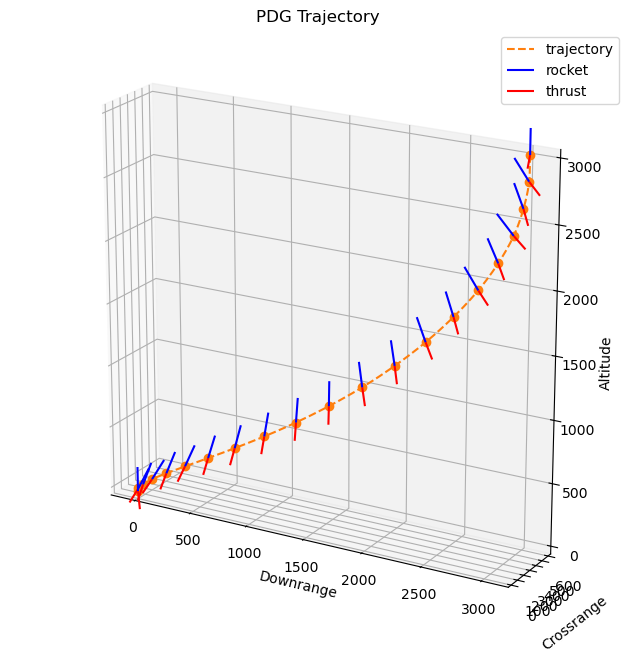

In [50]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.plot3D(ptr.solution.x[2, :], ptr.solution.x[3, :], ptr.solution.x[4, :],"o",color="tab:orange")
ax.plot3D(ptr.solution.xprop[2, :], ptr.solution.xprop[3, :], ptr.solution.xprop[4, :],"--",color="tab:orange", label="trajectory")
ax.quiver(ptr.solution.x[2, :], ptr.solution.x[3,:], ptr.solution.x[4, :], zquiver[1, :], zquiver[2, :], zquiver[3, :], length=200, arrow_length_ratio=0, color="blue", label="rocket")
ax.quiver(ptr.solution.x[2, :], ptr.solution.x[3,:], ptr.solution.x[4, :], -Fquiver[1, :], -Fquiver[2, :], -Fquiver[3, :], length=0.05, arrow_length_ratio=0, color="r", label="thrust")
# ax.quiver(p.xref[1, :], p.xref[2, :], p.xref[3, :], -ui[1, :], -ui[2, :], -ui[3, :], length=0.3, arrow_length_ratio=0, color="r", label="Thrust Vector")
ax.set_xlabel("Downrange")
ax.set_ylabel("Crossrange")
ax.set_zlabel("Altitude")
ax.set_title("PDG Trajectory")
ax.set_aspect("equal")
ax.legend()
ax.view_init(20, -60) # 20, -60
gcf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


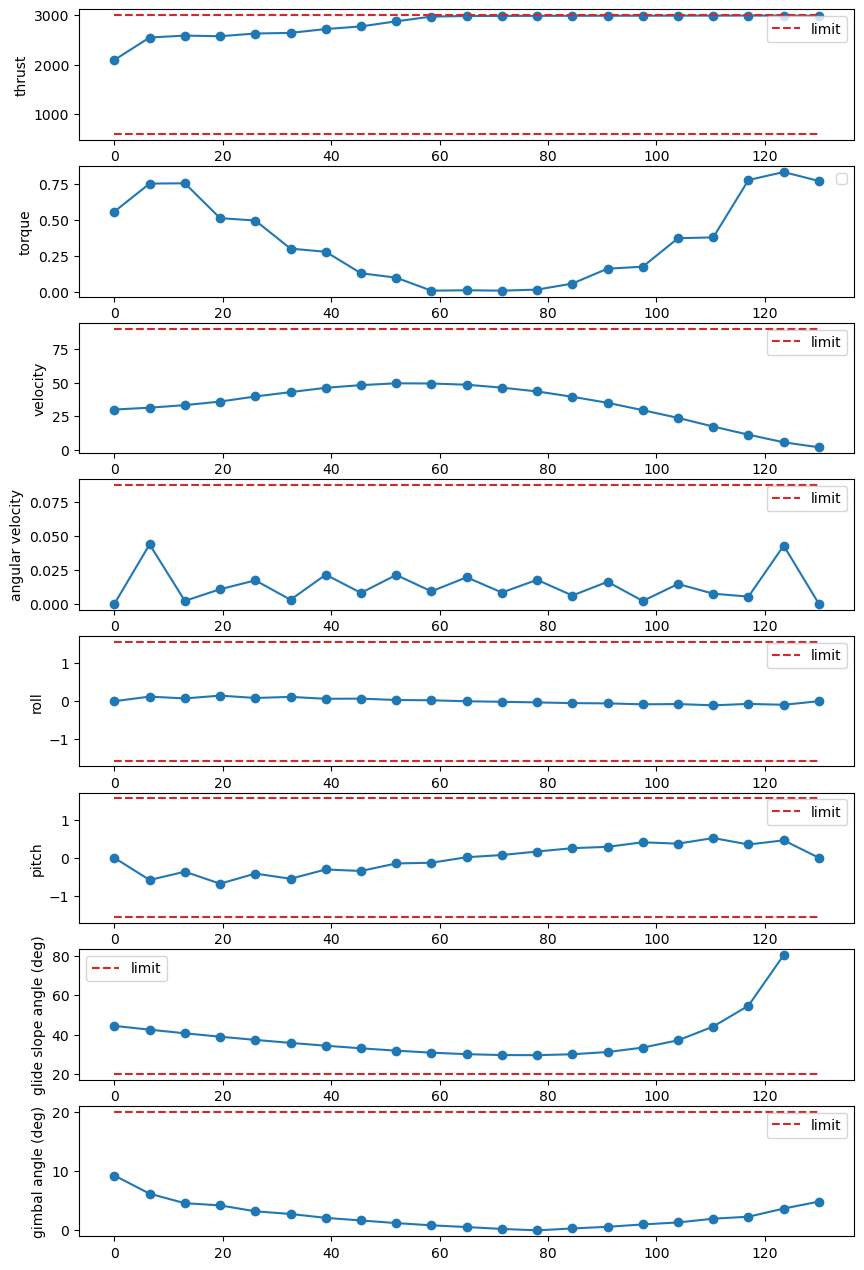

In [51]:
plt.figure(figsize=(10,20))
ax = plt.subplot(10,1,1)
ax.plot(ptr.solution.t,Fnorm,"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].Fmax,"--",color="tab:red",label="limit")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].Fmin,"--",color="tab:red")
ax.set_ylabel("thrust")
ax.legend()
ax = plt.subplot(10,1,2)
ax.plot(ptr.solution.t,Tnorm,"o-")
# ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].tau_max,"--",color="tab:red",label="limit")
ax.set_ylabel("torque")
ax.legend()
ax = plt.subplot(10,1,3)
ax.plot(ptr.solution.t,vnorm,"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].vmax,"--",color="tab:red",label="limit")
ax.set_ylabel("velocity")
ax.legend()
ax = plt.subplot(10,1,4)
ax.plot(ptr.solution.t,wnorm,"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].wmax,"--",color="tab:red",label="limit")
ax.set_ylabel("angular velocity")
ax.legend()
ax = plt.subplot(10,1,5)
ax.plot(ptr.solution.t,ptr.solution.x[8,:],"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].theta_max,"--",color="tab:red",label="limit")
ax.plot(ptr.solution.t,ptr.solution.t*0 .- ptr.constraint[1].theta_max,"--",color="tab:red")
ax.set_ylabel("roll")
ax.legend()
ax = plt.subplot(10,1,6)
ax.plot(ptr.solution.t,ptr.solution.x[9,:],"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ ptr.constraint[1].theta_max,"--",color="tab:red",label="limit")
ax.plot(ptr.solution.t,ptr.solution.t*0 .- ptr.constraint[1].theta_max,"--",color="tab:red")
ax.set_ylabel("pitch")
ax.legend()
ax = plt.subplot(10,1,7)
ax.plot(ptr.solution.t,rad2deg.(gamma),"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ rad2deg(ptr.constraint[1].gamma_s),"--",color="tab:red",label="limit")
ax.set_ylabel("glide slope angle (deg)")
ax.legend()
ax = plt.subplot(10,1,8)
ax.plot(ptr.solution.t,rad2deg.(delta),"o-")
ax.plot(ptr.solution.t,ptr.solution.t*0 .+ rad2deg(ptr.constraint[1].delta_max),"--",color="tab:red",label="limit")
ax.set_ylabel("gimbal angle (deg)")
ax.legend()
gcf()